In [244]:
import numpy as np
from scipy.integrate import simps, trapz
import matplotlib.pyplot as plt

In [4]:
%pwd

'/home/hyejin/Desktop/my_git/Hubbard_NN/2_nn/test_AtoG_Gtau'

$$
\begin{align}
G(i\omega_n) = \int_{-\infty}^{\infty} \frac{d \omega'}{2\pi} \frac{A(\omega')}{i\omega_n-\omega'}\\
G(\tau) = \frac{1}{\beta} \sum_n e^{-i\omega_n\tau}G(i\omega_n)
\end{align}
$$

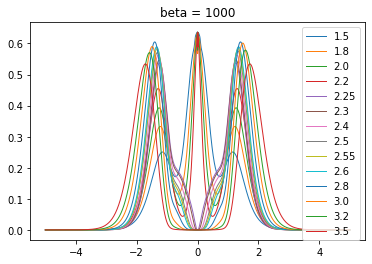

In [275]:
D = 1.
T = 0.001
beta = int(1./T)
N = 5000
if T == 0.001:
    add_dir = '_0.001'
    U_c1, U_c2 = 2.2, 2.59
    U = np.array([1.50, 1.80, 2.00, 2.20, 2.25, 2.30, 2.40, 2.50, 2.55, 2.60, 2.80, 3.00, 3.20, 3.50])
elif T == 0.01:
    add_dir = '_0.01'
    U_c1, U_c2 = 2.2, 2.37
    U = np.array([1.50, 1.80, 2.00, 2.20, 2.25, 2.30, 2.40, 2.50, 2.55, 2.60, 2.80, 3.00, 3.20, 3.50])
    
directory = '/home/hyejin/Desktop/my_git/Hubbard_NN/1_dmftsolver/NRG'
w_len = len(np.loadtxt(f'{directory}/4to1{add_dir}/Bethe-{2.00:.2f}_solution.dat', \
                       unpack = True, dtype = 'complex128')[0])
x = np.zeros((len(U), w_len), dtype = 'float64')

omega = np.pi/beta * (2*np.arange(N+1)+1) # w_n

for i, u in enumerate(U):
    w, A_w, G_w, S_w = np.loadtxt(f'{directory}/4to1{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
for i in range (np.shape(x)[0]):
    plt.title(f'beta = {beta}')
    plt.plot(w.real, x[i], lw = 1, label=U[i])
plt.legend()

In [269]:
for i in range (np.shape(x)[0]):
    print(abs(1 - simps(x[i], w.real)), abs(1 - trapz(x[i], w.real)))
    # <-- simps    trapz-->

1.862036419686408e-05 2.119019642421449e-06
1.9693932457820473e-05 3.1928265256109256e-06
2.437758226658815e-05 7.87663204482314e-06
1.7668994552133555e-05 1.1679970677302975e-06
3.2776642711063175e-06 1.9777796423703364e-05
4.0957192146695576e-06 2.0595998471151233e-05
2.585538941390908e-06 1.908620643487069e-05
3.2112955850038816e-07 1.682225199628462e-05
2.833959630299532e-07 1.6218001352985567e-05
5.926661247324105e-07 1.590901997783334e-05
5.155023995451202e-07 1.598724818396846e-05
1.9967508568807801e-07 1.6303540005147e-05
1.210606267454395e-07 1.6381936842169154e-05
6.963924129577137e-07 1.5803267957581468e-05


In [278]:
def G(x):
    N = len(omega)
    return np.array([simps(x/(1j*omega[i]-w.real), w.real) for i in range (N)])

In [306]:
len(omega)
np.savetxt(f'{u:.2f}.txt', np.array([f'{u:.2f}']), fmt='%s')

In [282]:
G_omega1 = np.zeros((len(x), len(omega)), dtype = 'complex128')
G_omega2 = np.zeros((len(x), len(omega)), dtype = 'complex128')
for i, u in enumerate(U):
    w, A_w, G_w, S_w = np.loadtxt(f'{directory}/1to4{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
    G_omega1[i] = G(x[i])
    np.savetxt(f'./Giw/Giw_1to4_{beta}_{u:.2f}.dat', np.array([omega.real, G_omega1[i].real, G_omega1[i].imag]).T)
    
    w, A_w, G_w, S_w = np.loadtxt(f'{directory}/4to1{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
    G_omega2[i] = G(x[i])
    np.savetxt(f'./Giw/Giw_4to1_{beta}_{u:.2f}.dat', np.array([omega.real, G_omega2[i].real, G_omega2[i].imag]).T)

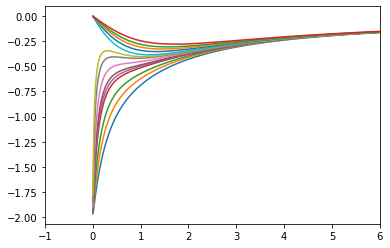

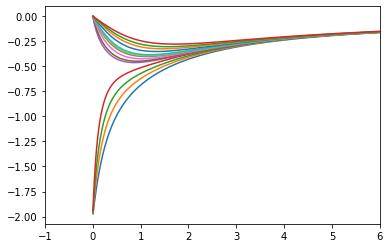

In [297]:
for i, u in enumerate(U):
    plt.plot(omega, G_omega1[i].imag, label = f'{u:.2f}_imag')
    #plt.plot(omega, G_omega[i].real, label = f'{u:.2f}_real')
    #if i > 4: plt.axvline(omega[np.argmin(G_omega[i].imag)], ls = '--', c = 'k', \
    #                        label = f'{omega[np.argmin(G_omega[i].imag)]}')
plt.xlim(-1,6)
plt.show()
    
    #if i == 4: print("(up: metal)==========================(down: insulator)")
    
    
for i, u in enumerate(U):
    plt.plot(omega, G_omega2[i].imag, label = f'{u:.2f}_imag')
    #plt.plot(omega, G_omega[i].real, label = f'{u:.2f}_real')
    #if i > 4: plt.axvline(omega[np.argmin(G_omega[i].imag)], ls = '--', c = 'k', \
    #                        label = f'{omega[np.argmin(G_omega[i].imag)]}')
plt.xlim(-1,6)
plt.show()
    
    #if i == 4: print("(up: metal)==========================(down: insulator)")

(-1.0, 6.0)

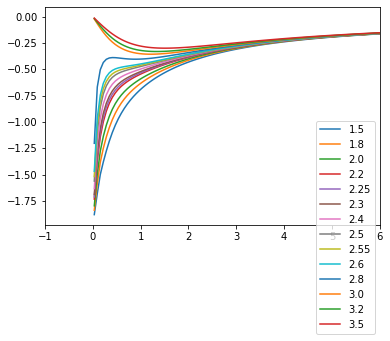

In [298]:
for i,u in enumerate(U):
    w, Giw_r, Giw_i = np.loadtxt(f'/home/hyejin/Desktop/my_git/Hubbard_NN/1_dmftsolver/ED/1to4_0.001/Giw-{u:.2f}.dat', \
                                      unpack = True, dtype = 'complex128')
    plt.plot(w.real, Giw_i.real, label=u)
plt.legend(bbox_to_anchor=(1,0.5))
plt.xlim(-1, 6)

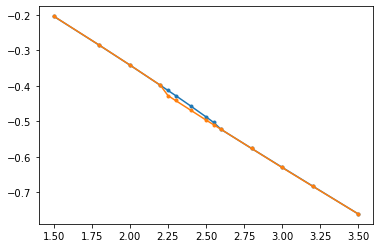

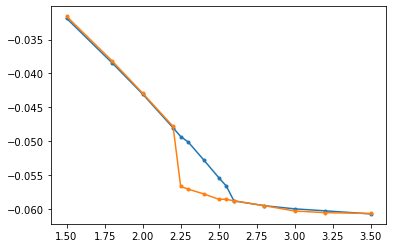

In [289]:
G_omega1 = np.zeros((len(x), len(omega)), dtype = 'complex128')
G_omega2 = np.zeros((len(x), len(omega)), dtype = 'complex128')
Sigma_iw1 = np.zeros_like(G_omega1, dtype = 'complex128')
Sigma_iw2 = np.zeros_like(G_omega2, dtype = 'complex128')
double_occ1 = np.zeros(len(x), dtype = 'complex128')
double_occ2 = np.zeros(len(x), dtype = 'complex128')
dens1 = np.zeros(len(x), dtype = 'complex128')
dens2 = np.zeros(len(x), dtype = 'complex128')
for i, u in enumerate(U):
    w, A_w, G_w, S_w = np.loadtxt(f'{directory}/1to4{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
    G_omega1[i] = G(x[i])
    mu = u/2.0
    Sigma_iw1[i] = (1j*omega + mu -(D/2.0)**2*G_omega1[i]) - 1./G_omega1[i]
    double_occ1[i] = 0.5*T/u * np.sum(G_omega1[i]*Sigma_iw1[i]) + 1j*u/4.0
    
    w, A_w, G_w, S_w = np.loadtxt(f'{directory}/4to1{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
    G_omega2[i] = G(x[i])
    mu = u/2.0
    Sigma_iw2[i] = (1j*omega + mu -(D/2.0)**2*G_omega2[i]) - 1./G_omega2[i]
    double_occ2[i] = 0.5*T/u * np.sum(G_omega2[i]*Sigma_iw2[i]) + 1j*u/4.0
    
plt.plot(U, -double_occ1.imag, '.-')
plt.plot(U, -double_occ2.imag, '.-')
plt.show()
plt.plot(U, double_occ1.real, '.-')
plt.plot(U, double_occ2.real, '.-')
plt.show()

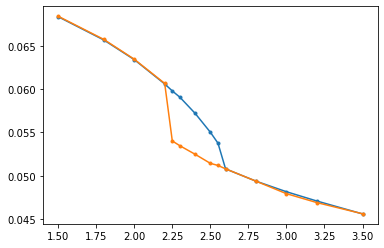

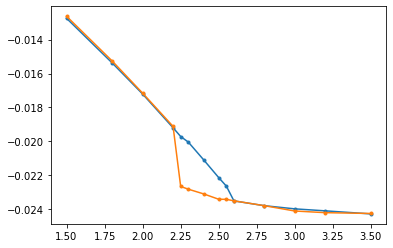

In [285]:
G_omega1 = np.zeros((len(x), len(omega)), dtype = 'complex128')
G_omega2 = np.zeros((len(x), len(omega)), dtype = 'complex128')
Sigma_iw1 = np.zeros_like(G_omega1, dtype = 'complex128')
Sigma_iw2 = np.zeros_like(G_omega2, dtype = 'complex128')
double_occ1 = np.zeros(len(x), dtype = 'complex128')
double_occ2 = np.zeros(len(x), dtype = 'complex128')
dens1 = np.zeros(len(x), dtype = 'complex128')
dens2 = np.zeros(len(x), dtype = 'complex128')
for i, u in enumerate(U):
    w, A_w, G_w, S_w = np.loadtxt(f'{directory}/1to4{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
    G_omega1[i] = G(x[i])
    mu = u/2.0
    Sigma_iw1[i] = (1j*omega + mu -(D/2.0)**2*G_omega1[i]) - 1./G_omega1[i]
    double_occ1[i] = 1/u * np.fft.ifft(np.conjugate(G_omega1[i]*Sigma_iw1[i]))[0] #- u/4.0
    
    w, A_w, G_w, S_w = np.loadtxt(f'{directory}/4to1{add_dir}/Bethe-{u:.2f}_solution.dat', \
                                  unpack = True, dtype = 'complex128')
    x[i] = A_w.real.copy()
    G_omega2[i] = G(x[i])
    mu = u/2.0
    Sigma_iw2[i] = (1j*omega + mu -(D/2.0)**2*G_omega2[i]) - 1./G_omega2[i]
    double_occ2[i] = 1/u * np.fft.ifft(np.conjugate(G_omega2[i]*Sigma_iw2[i]))[0] #- u/4.0
    
plt.plot(U, double_occ1.imag, '.-')
plt.plot(U, double_occ2.imag, '.-')
plt.show()
plt.plot(U, double_occ1.real, '.-')
plt.plot(U, double_occ2.real, '.-')
plt.show()

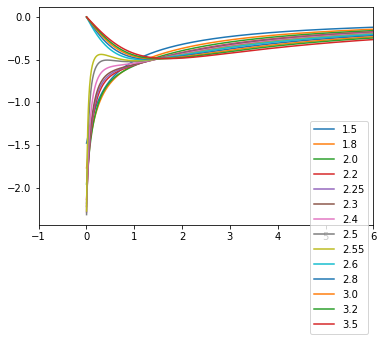

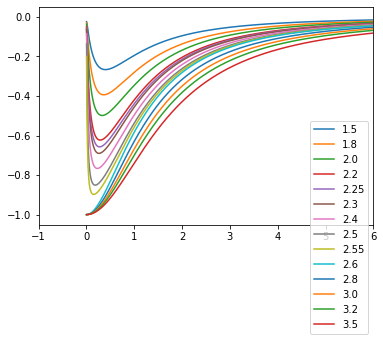

In [286]:
for i, u in enumerate(U[:]):
    plt.plot(omega, (G_omega1[i]*Sigma_iw1[i]).imag, label=u)
plt.legend(bbox_to_anchor=(1,0.5))
plt.xlim(-1, 6)
plt.show()
for i, u in enumerate(U[:]):
    plt.plot(omega, (G_omega1[i]*Sigma_iw1[i]).real, label=u)
plt.legend(bbox_to_anchor=(1,0.5))
plt.xlim(-1, 6)
plt.show()

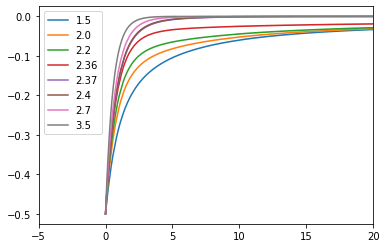

In [19]:
tau = np.linspace(0, beta, (N+1)*10)
for i, u in enumerate (U):
    G_t = np.loadtxt(f'./Gtau/Gt_{beta}_{u:.2f}.dat', unpack = True, dtype = 'float64')
    plt.plot(tau, G_t, '-', label = u)
    plt.xlim(-5, 20)
    plt.legend()

In [2]:
w, A, G_r, G_i, S_r, S_i, Xn_r, Xn_i, Xs_r, Xs_i = np.loadtxt(f'./doccprac/Bethe-{2.00:.2f}.dat', \
                                                                  unpack=True, dtype = 'float64')
simps(Xn_r+1j*Xn_i, w), np.fft.ifft(Xn_r+1j*Xn_i)[0]

((0.054968236164562784+2.0816787590840092e-16j),
 (0.06607779779006753+5.082197683525802e-20j))

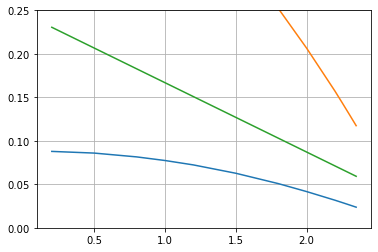

In [290]:
def f(x):
    return -0.079687153284671*x+0.246485521897809
U = np.array([0.20,0.50,0.80,1.00,1.20,1.50,1.80,2.00,2.20,2.25,2.30,2.35])
docc1 = np.zeros(len(U), dtype='complex128')
docc2 = np.zeros(len(U), dtype='complex128')
chiNN = np.zeros(len(U), dtype='complex128')
chiSS = np.zeros(len(U), dtype='complex128')
for i, u in enumerate(U):
    w, A, G_r, G_i, S_r, S_i, Xn_r, Xn_i, Xs_r, Xs_i = np.loadtxt(f'./doccprac/Bethe-{u:.2f}.dat', \
                                                                  unpack=True, dtype = 'float64')
    chiNN[i] = simps(Xn_r+1j*Xn_i, w)
    chiSS[i] = simps(Xs_r+1j*Xs_i, w)

docc1 = chiNN-chiSS
docc2 = 4*chiNN-chiSS
plt.plot(U, docc1.real)
plt.plot(U, docc2.real)
plt.plot(U, f(U))
plt.ylim(0, 0.25)
plt.grid(True)